In [1]:
import sys
sys.path.append("../..")

In [2]:
from api.design import Design
design = Design(topo_row=3, topo_col=3)
design.topology.generate_random_edges(edges_num=100)

随机生成拓扑边的数量是100...
设置的边太多，自动降为能容纳边数的最大值: 12


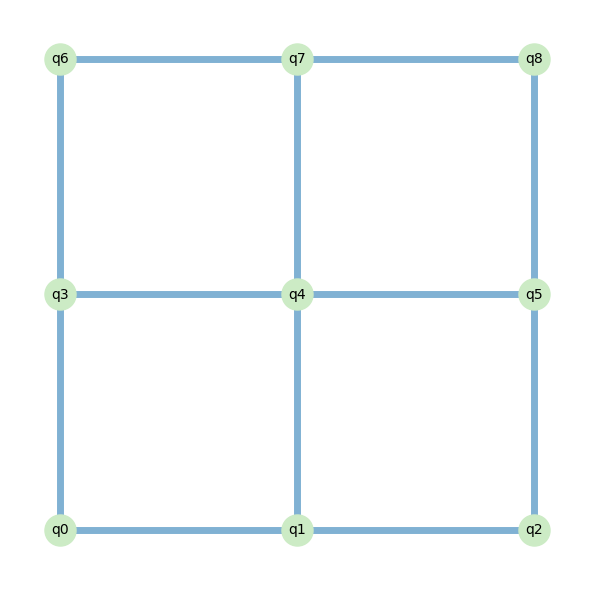

In [3]:
design.topology.show_image()

svg文件保存在：./svg/Gds.svg


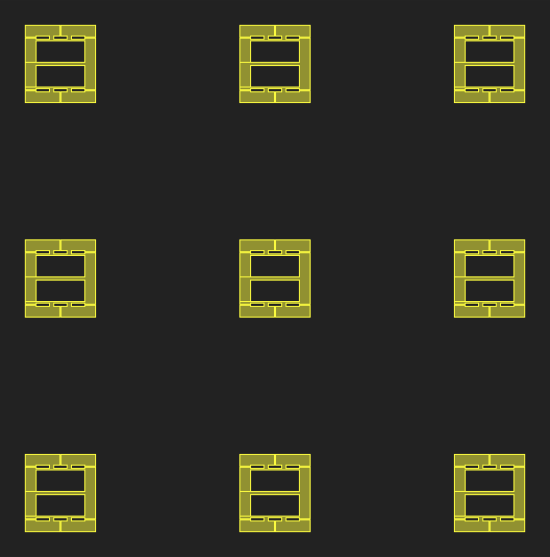

In [4]:
design.generate_qubits(topology=True, qubits_type="Transmon", dist=2000, chip_name="chip0")
design.gds.show_svg()

Generating coupling lines based on topology information...
svg文件保存在：./svg/Gds.svg


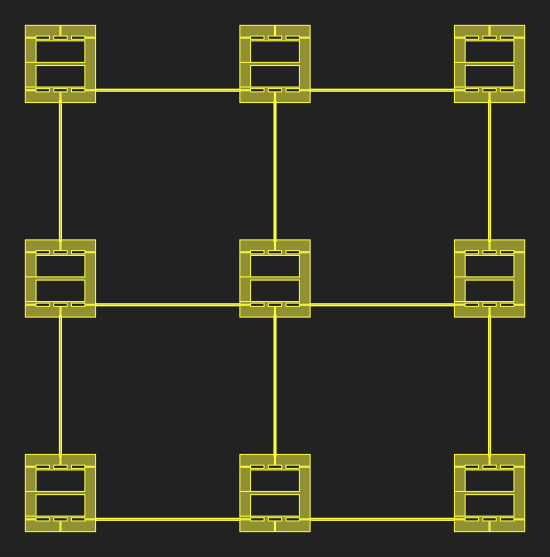

In [5]:
design.generate_coupling_lines(topology=True, qubits=True, cpls_type="CouplingLineStraight")
design.gds.show_svg()

In [6]:
design.generate_chip(qubits=True, chip_name='chip0')

In [7]:
from addict import Dict
options = Dict(
    name = "chip1",
    type = "RecChip",
    start_pos = (-4000, -4000),
    end_pos = (8000, 8000)
)
design.gds.chips.add(options)  #添加芯片层

svg文件保存在：./svg/Gds.svg


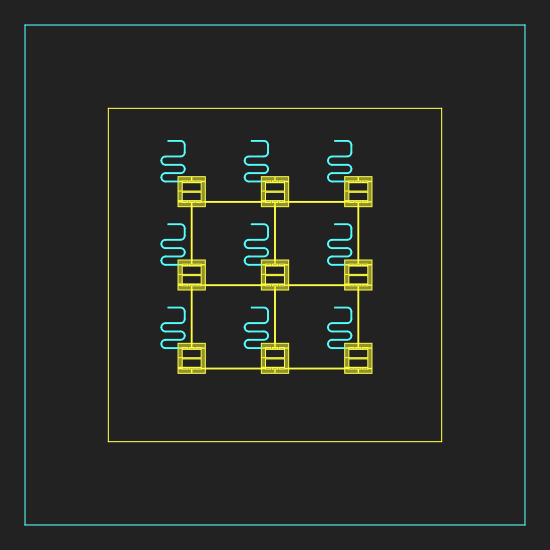

In [8]:
design.generate_readout_lines(qubits=True, rdls_type="ReadoutCavity", chip_name='chip1')
design.gds.show_svg()

In [9]:
design.gds.readout_lines.q0_readout.show_options()

name: q0_readout
type: ReadoutCavity
chip: chip1
start_pos: (-327.5, 245.0)
end_pos: (-327.5, 1245.0)
coupling_length: 300
orientation: 90
outline: 
    []
length: 3000
cpw_width: 10
start_straight: 300
start_r: 100
r: 100
couple_length: 275
space: 26.5
gap: 5


In [10]:
design.gds.readout_lines.q0_readout.change_option(op_name="length", op_value=4000)

svg文件保存在：./svg/Gds.svg


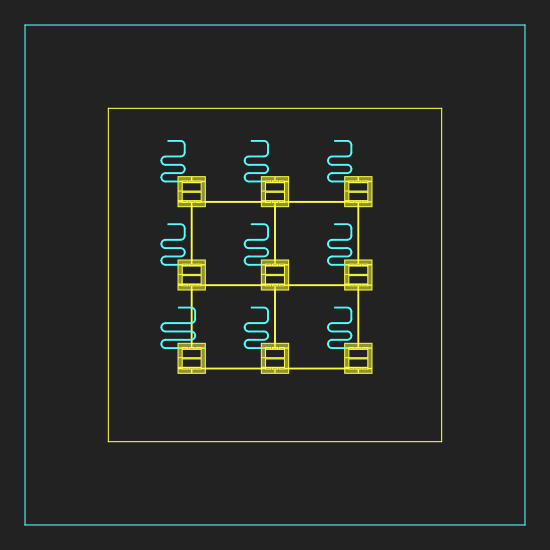

In [11]:
design.gds.show_svg()

In [12]:
design.gds.readout_lines.q0_readout.change_option(op_name="start_straight", op_value=500)

In [13]:
design.gds.readout_lines.batch_change(name_list=['q0_readout', 'q1_readout'], op_name="chip", op_value="chip1")

In [14]:
options = Dict(
    # 框架
    name = "pin0",
    type = "LaunchPad",
    chip = "chip1",
    pos=(-3500, 0),
    outline = [],
    # 几何参数
    trace_width=5,
    trace_gap=3,
    taper_height=100,
    pad_width=250,
    pad_height=250,
    pad_gap=100,
    orientation=90,
    start_straight=50,
    distance_to_chip=350,
    distance_to_qubits=3650
)
design.gds.pins.add(options)

svg文件保存在：./svg/Gds.svg


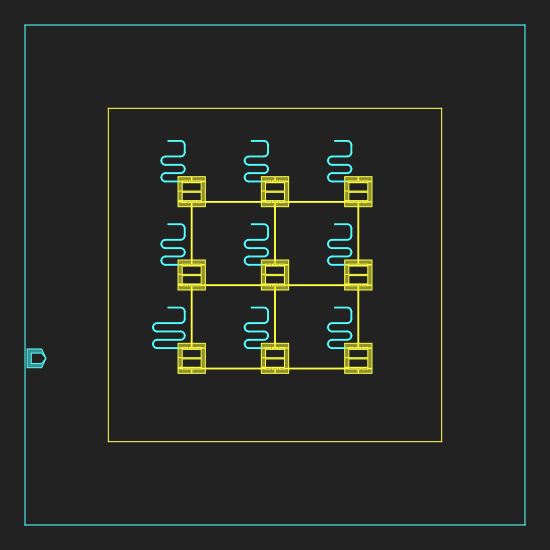

In [15]:
design.gds.show_svg()

In [16]:
options = Dict(
    # 框架
    name="transmission1",
    type="TransmissionPath",
    chip = "chip1",
    outline = [],   
    # 几何参数
    pos = [(-3500, 0), (0, 0), (200,200), (500,300),(500,500)],
    width=10,
    gap=5,
    corner_radius=100
)
design.gds.transmission_lines.add(options)

In [17]:
options = Dict(
        # 框架
        name="transmission2",
        type="ControlLineWidthDiff",
        chip = "chip1",
        outline = [],
        # 几何参数
        pos = [(500, 500), (500, 550)],
        width=[10, 4],
        gap=[5, 2],
        buffer_length = 20,
        corner_radius=20
    )
design.gds.control_lines.add(options)

In [18]:
design.gds.auto_generate_air_bridge(line_type="transmission_lines",
                                    line_name="transmission1",
                                    spacing=120, 
                                    chip_name="chip3")

生成空气桥的数量为： 37


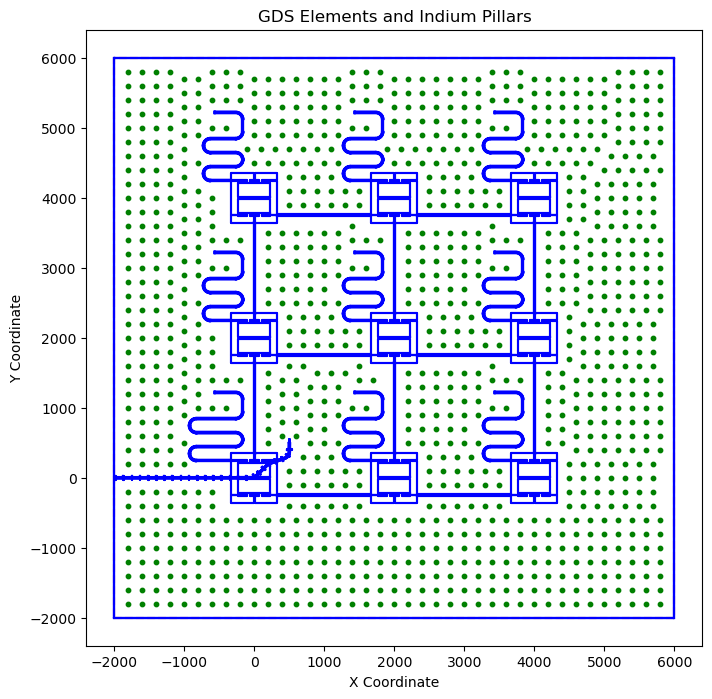

In [19]:
coord1 = (-2000, -2000)
coord2 = (6000, 6000)
min_distance_points = 200
min_distance_polygons = 100
design.gds.auto_generate_indium_bumps(coord1, coord2, min_distance_points, min_distance_polygons, chip_name="chip1", type="IndiumBump")

In [20]:
design.gds.show_gds()

In [21]:
design.export_options("design_ops.txt")

Data exported successfully to design_ops.txt
